Test that network initialization is correct (in-degree of bot agents aligns with gamma value)
e.g: if we have ~10000 humans and gamma=0.005, in-degree of bots should be ~50

In [21]:
""" Script for running simulation - Use for debugging"""

from infosys.ig_InfoSys import InfoSystem
import infosys.utils as utils
import infosys.ig_utils as ig_utils
import infosys.graphutils as graphutils
import networkx as nx 
import json
import os
import copy
import gzip 
import numpy as np

# ABS_PATH = "/N/u/baotruon/Carbonate/marketplace"
ABS_PATH = '..'
DATA_PATH = os.path.join(ABS_PATH, "data")
# TODO: save network as .gml.gz, keep only friend relationships


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_agent_degree_dist(graph, mode='in', plot_fpath=None):
    
    human_vertices = [v for v in graph.vs if v['bot']==0]
    human_degs = graph.degree(human_vertices, mode=mode, loops=False)
    
    bot_vertices = [v for v in graph.vs if v['bot']==1]
    bot_degs = graph.degree(bot_vertices, mode=mode, loops=False)
    
    figure, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.ecdfplot(ax=ax, data = human_degs, complementary=True, label = 'human')
    sns.ecdfplot(ax=ax, data = bot_degs, complementary=True, label = 'bot')
    ax.set_xlabel("Degree")
    ax.legend()
    ax.set_title("CCDF: Degree dist. of agents")
    figure.tight_layout()
    if plot_fpath is not None:
        figure.savefig(plot_fpath, dpi=300)
        plt.close(figure)
    else:
        figure.show()

In [25]:
mode='igraph'
path = DATA_PATH

follower_path = os.path.join(path, "follower_network.gml")
infosys_path = os.path.join(path, mode, "network.gml")

net_specs = {
    "targeting_criterion": "hubs",
    # "human_network": follower_path,
    "human_network": None, #DEBUG
    "n_humans": 1000,
    "beta": 0.01,
    "gamma": 0.05,
    "verbose": True,
}

infosys_specs = {
    "trackmeme": True,
    "tracktimestep": True,
    "track_forgotten": True,
    "verbose": True,
    "epsilon": 0.1, #TODO: change back to 0.001
    "mu": 0.5,
    "phi": 1,
    "alpha": 15,
}

avg_bot_degs = []
for i in range(100):
    G = ig_utils.init_net(**net_specs)
    graph=G
    bot_vertices = [v for v in graph.vs if v['bot']==1]
    bot_degs = graph.degree(bot_vertices, mode='in', loops=False)
    avg_bot_degs += [np.mean(bot_degs)]

Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans f

Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating human network...
Generating bot network...
Merging human and bot networks...
Humans following bots...
Generating 

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([50.9, 51. , 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9]),
 <BarContainer object of 10 artists>)

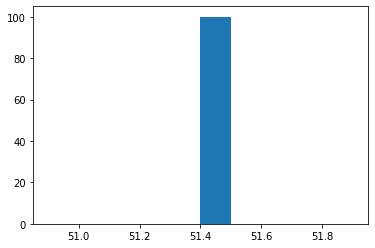

In [26]:
plt.hist(avg_bot_degs)

/Users/Shared/miniforge3/envs/graph/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_4224/3381992793.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


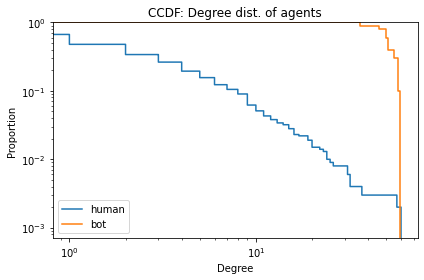

In [27]:
plot_agent_degree_dist(G, mode='in')

In [28]:
mode='igraph'
path = DATA_PATH

follower_path = os.path.join(path, "follower_network.gml")
infosys_path = os.path.join(path, mode, "network.gml")

net_specs = {
    "targeting_criterion": "hubs",
    "human_network": follower_path,
#     "human_network": None, #DEBUG
    "n_humans": 1000,
    "beta": 0.01,
    "gamma": 0.05,
    "verbose": True,
}

infosys_specs = {
    "trackmeme": True,
    "tracktimestep": True,
    "track_forgotten": True,
    "verbose": True,
    "epsilon": 0.1, #TODO: change back to 0.001
    "mu": 0.5,
    "phi": 1,
    "alpha": 15,
}

G = ig_utils.init_net(**net_specs)

Reading human network...
File:  ../data/follower_network.gml
Generating bot network...
Merging human and bot networks...
Humans following bots...


In [34]:
bot_vertices = [v for v in G.vs if v['bot']==1]
bot_degs = G.degree(bot_vertices, mode='in', loops=False)
np.mean(bot_degs)

502.65

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_4224/3381992793.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


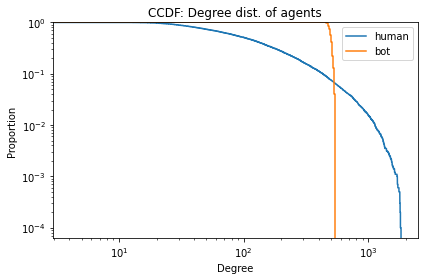

In [30]:
plot_agent_degree_dist(G, mode='in')

In [31]:
num_humans = len([v for v in G.vs])
exp_bot_deg = num_humans * 0.05

In [32]:
exp_bot_deg

505.3

In [ ]:
bao_simulation(mode='igraph')

In [36]:
a = 0.005
type(float(a))

float